# 01 — EDA

In [1]:
import os, pandas as pd, numpy as np, matplotlib.pyplot as plt
from pathlib import Path

# Create folders
Path('data/raw').mkdir(parents=True, exist_ok=True)
Path('assets').mkdir(parents=True, exist_ok=True)

# Download dataset (IBM sample mirrored on GitHub)
url = "https://raw.githubusercontent.com/fenago/datasets/main/WA_Fn-UseC_-Telco-Customer-Churn.csv"
local_csv = Path('data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')
if not local_csv.exists():
    import urllib.request
    urllib.request.urlretrieve(url, local_csv)

df = pd.read_csv(local_csv)
print(df.shape)
df.head()


(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Churn rate: 0.266


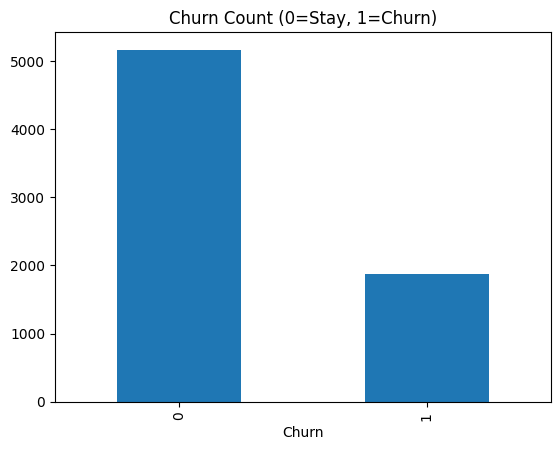

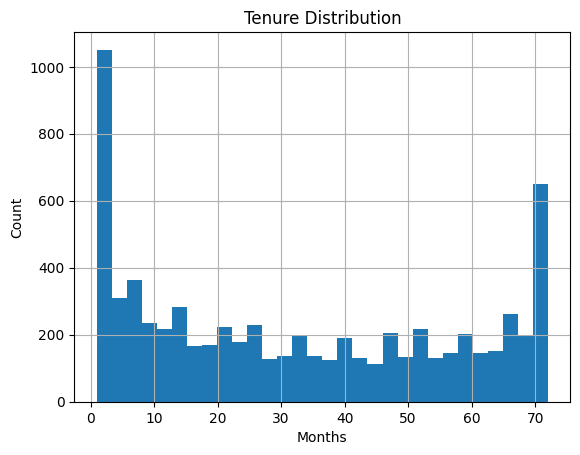

In [2]:
# Basic cleaning
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges'])
df['Churn'] = df['Churn'].map({'Yes':1,'No':0})
print('Churn rate:', df['Churn'].mean().round(3))

# Simple visuals
plt.figure()
df['Churn'].value_counts().sort_index().plot(kind='bar')
plt.title('Churn Count (0=Stay, 1=Churn)')
plt.savefig('assets/churn_count.png', bbox_inches='tight')
plt.show()

plt.figure()
df['tenure'].hist(bins=30)
plt.title('Tenure Distribution')
plt.xlabel('Months')
plt.ylabel('Count')
plt.savefig('assets/tenure_hist.png', bbox_inches='tight')
plt.show()
